# 遞迴特徵消去法(Recursive feature elimination)

## 載入相關套件

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

## 載入資料集

In [4]:
X, y = datasets.load_iris(return_X_y=True)
X.shape

(150, 4)

## RFE 特徵選取

In [7]:
svc = SVC(kernel="linear", C=1)
clf = RFE(estimator=svc, n_features_to_select=2, step=1)
X_new = clf.fit_transform(X, y)
X_new.shape

(150, 2)

In [9]:
# 特徵重要性排名
clf.ranking_

array([3, 2, 1, 1])

## 3. 不須進行特徵工程

## 4. 資料分割

In [10]:
# 選擇2個特徵
X = X_new

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

## 特徵縮放

In [11]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [13]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [14]:
y_pred = clf.predict(X_test_std)
y_pred

array([2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1,
       1, 1, 2, 0, 2, 0, 0, 0])

In [15]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

93.33%


In [16]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 10  2]
 [ 0  0  6]]


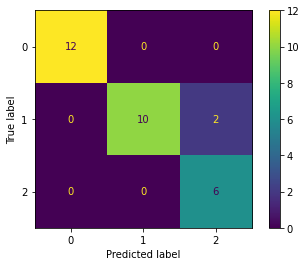

In [18]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## 使用全部特徵

In [21]:
# 載入資料集
X, y = datasets.load_iris(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 特徵縮放
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 模型訓練
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_std, y_train)

# 模型計分
y_pred = clf.predict(X_test_std)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

(120, 4) (30, 4) (120,) (30,)
96.67%
